In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import datetime

In [2]:
df_transaction = pd.read_csv('train_transaction.csv')


In [ ]:
pd.options.display.max_columns = None
df_transaction.head(20)

In [ ]:
class cleaning(object):
    
    def __init__(self,df):
        self.all_na = df.isnull().sum()/df.shape[0]

    def clean_na(self,df):
        self.less_na = all_na[all_na < 0.90]
        return df.loc[:,less_na]
    
    def subset(self,df,index):
        return df.iloc[:,index]

In [ ]:
# only small percentage of values are fraudalent.
(df_transaction.isFraud.value_counts() / df_transaction.shape[0] ) *100

In [ ]:
#not removing columns simply because it has more NA
#maybe more values in less number of rows can help us detect fraud
#lets compare NAs in both tables fraud=0 and fraud=1
df_isfraud_yes = df_transaction[df_transaction.isFraud==1]
df_isfraud_no = df_transaction[df_transaction.isFraud==0]

comparision = cleaning(df_isfraud_no)
values_no = comparision.all_na.values
comparision = cleaning(df_isfraud_yes)
values_yes = comparision.all_na.values


In [ ]:
# here I computed percentage of na values in both fradualant and non fraudalent dataframe
# this procudeure was to identify if let's say whole columns had 90% missing values
# but rest 10% belongs to fraudalent dataset. That is why this was important to analyse indipendently
pd.set_option('display.max_rows', 500)
values = pd.DataFrame(values_no,values_yes).reset_index(inplace=False)
values.columns = ["fraud_no","fraud_yes"]
values["difference"] = ((values.fraud_no - values.fraud_yes) / values.fraud_no ) * 100 
values.difference[values.difference.isna()] = 0
values = values[(values.difference >= 0) & (values.fraud_no < 0.50) & (values.fraud_yes < 0.50)]
index_values = values.index
index_values

In [ ]:
# here I am calling the function subset in thr cleaning class
comparision = cleaning(df_transaction)
df_transaction = comparision.subset(df_transaction,index_values)
df_transaction.head()

In [ ]:
times=[]

def time_conversion(df):
    for i in range(df.shape[0]):
        t = df.TransactionDT[i]
        t = datetime.datetime.fromtimestamp( t )
        t = t.replace()
        times.append(t)
    df.TransactionDT = times
    return df

df_transaction = time_conversion(df_transaction)
df_transaction.head()

In [ ]:
time = pd.Series( (round((df_transaction.TransactionDT /(60*60)))))

In [ ]:
anomalies = pd.Series(df_transaction.isFraud)

In [ ]:
time_anomiles = pd.concat([time,anomalies],axis=1)
plt.plot(time_anomiles.)

In [ ]:
time_anomiles = pd.concat([time,anomalies],axis=1)
time_anomiles = time_anomiles.groupby("TransactionDT").sum().reset_index()
plt.figure(figsize=(15,7))
plt.plot(time_anomiles.TransactionDT,time_anomiles.isFraud)


In [ ]:
time_anomiles

In [ ]:
import datetime
t = 86458
t = (datetime.datetime.fromtimestamp(t))
t = t.replace()
print(t)

In [ ]:
df_transaction.head()

In [ ]:
try1 = df_transaction.iloc[:,1:10]
try1 = try1.drop("ProductCD",axis=1)
try1.head()

for i in range(2,(try1.shape[1]  )):
    try1.iloc[:,i] = try1.iloc[:,i].fillna(try1.iloc[:,i].median())

try1.head()

In [4]:
import sklearn 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest
import xgboost as xgb
import statsmodels.api as stats
import matplotlib.pyplot as plt

class predictions(object):
    
    def __init__(self):
        return
    
    def oversampeling(x,y):
        smt = SMOTE()
        x,y = smt.fit_sample(x,y)
        return x,y
    
    def feature_selection(self,df,num_features):
        df.fillna(0)
        best = SelectKBest(chi2,num_features)
        fit = best.fit(df.iloc[:,:-1],df.iloc[:,-1])
        score = pd.DataFrame(fit.scores_)
        cols = pd.DataFrame(df.columns)
        fs = pd.concat([score,cols],axis=1)
        fs.columns = ["score","col"]
        fs = fs.sort_values("score",ascending=False)
        top = fs["col"]
        df = df.loc[:,top]
        return df
    
    def boosting(self,df):
        train_x,test_x , train_y,test_y = train_test_split(df.iloc[:,:-1],df.isFraud)
        smt = SMOTE()
        train_x,train_y = smt.fit_sample(train_x,train_y)
        train_x = pd.DataFrame(train_x)
        train_x.columns = test_x.columns
        model = xgb.XGBClassifier()
        model.fit(train_x,train_y)
        pred_prob = model.predict_proba(test_x)
        pred_prob = pred_prob[:,1]
        pred = model.predict(test_x)
        acc = accuracy_score(test_y,pred)
        
        auc = roc_auc_score(test_y,pred)
        fpr, tpr, therashold = roc_curve(test_y,pred_prob)
        report = classification_report(pred,test_y)
        con_mat = confusion_matrix(test_y,pred)
        
        return auc, fpr,tpr,therashold, report, acc, con_mat
        
        
    
    def logistic(self,df):
        train_x,test_x , train_y,test_y = train_test_split(df.iloc[:,2:8],df.isFraud,random_state=57,test_size=0.3)
        train_x,test_x , train_y,test_y = train_test_split(df.iloc[:,:-1],df.isFraud,random_state=57,test_size=0.3)
        smt = SMOTE()
        train_x,train_y = smt.fit_sample(train_x,train_y)
        
        model = LogisticRegression()
        model.fit(train_x,train_y)
        pred_prob = model.predict_proba(test_x)
        pred_prob = pred_prob[:,1]
        pred = model.predict(test_x)
        acc = accuracy_score(test_y,pred)
        
        auc = roc_auc_score(test_y,pred)
        fpr, tpr, therashold = roc_curve(test_y,pred_prob)
        report = classification_report(pred,test_y)
        con_mat = confusion_matrix(test_y,pred)
        return auc, fpr,tpr,therashold, report, acc, con_mat
        return acc
    
    def randomforest(df):
        train_x,test_x , train_y,test_y = train_test_split(df.iloc[:,2:8],df.isFraud,random_state=57,test_size=0.3)
        model = RandomForestClassifier(n_estimators=50,max_depth=3,random_state=0)
        model.fit(train_x,train_y)
        pred = model.predict_proba(test_x)
        acc = accuracy_score(test_y,pred)
        pred = pred[:,1]        
        auc = roc_auc_score(test_y,pred)
        fpr, tpr, therashold = roc_curve(test_y,pred)
        return auc, fpr,tpr,therashold


area under the curve0.7596265696742115
total accuracy0.8701866088664612
confusion matrix is[[125122  17287]
 [  1878   3348]] 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93    127000
           1       0.64      0.16      0.26     20635

    accuracy                           0.87    147635
   macro avg       0.76      0.57      0.59    147635
weighted avg       0.85      0.87      0.84    147635



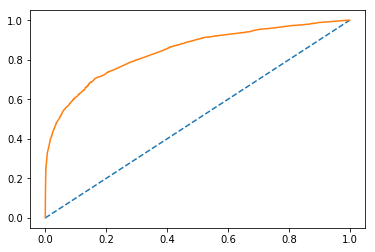

In [8]:
pred = predictions()
df = pred.feature_selection(c_only,5)
df["isFraud"] = df_transaction.isFraud

auc, fpr,tpr,therashold, report, accuracy, con_mat = pred.boosting(df)
print("area under the curve{}".format(auc))
print("total accuracy{}".format(accuracy))
print("confusion matrix is{} ".format(con_mat))
print(report)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr)

In [ ]:
predictions = predictions

accuracy =  predictions.logistic(try1)
accuracy

In [ ]:
# cross check fraud and productCD

pd.crosstab(df_transaction.isFraud,df_transaction.ProductCD)

In [ ]:
test = pd.read_csv("test_transaction.csv")

In [ ]:
#there is difference between dimension reduction(PCA) and feature selection(RIDGE LASSO)
# FEATURE SELECTION SHOULD BE PERFORMED IN EACH LOOP OF CROSS VALIDATION. 
#Do not perform feature selction only once and then use cross-validation, this will elad to overfitting.
# correlation calclatino can also be helpful

In [ ]:
a = ["kshitiz","sirohi"," itraz"]
b = "it"
for i in a:
    print(b in i)

In [ ]:
c= "C"
columns_c = df_transaction.iloc[:,[True for i in df_transaction.columns if c in i ]]

In [6]:
try2 = df_transaction.iloc[:,10:]
try2["isFraud"] = df_transaction.isFraud

In [ ]:
try2.head()

In [7]:

c_only = try2.filter(like="C")
c_only["isFraud"]= try2.isFraud

d_only = try2.filter(like="D")
d_only["isFraud"] = try2.isFraud
d_only = d_only.fillna(0)

m_only = try2.filter(like="M")
m_only["isFraud"] = try2.isFraud
m_only = m_only.fillna(0)

v_only = try2.filter(like="V")
v_only["isFraud"] =try2.isFraud
v_only = v_only.fillna(0)

C:\Users\ksiro\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ksiro\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ksiro\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

MemoryError: 

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.model_selection import train_test_split

trainx, testx, trainy, testy = train_test_split(v_only.iloc[:,:-1],v_only.isFraud,test_size=.3)
model = LogisticRegression()
rfe = RFE(model,100)
#rfe = rfe.fit(trainx,trainy)
print(rfe.support_)

#model.fit(trainx,trainy)
#pred = model.predict(testx)
#acc = accuracy_score(pred,testy)
#acc

In [ ]:
print(classification_report(testy,pred))

In [ ]:
from sklearn.feature_selection import chi2, SelectKBest

best = SelectKBest(chi2,4)
fit = best.fit(c_only.iloc[:,:-1],c_only.iloc[:,-1])
score = pd.DataFrame(fit.scores_)
cols = pd.DataFrame(c_only.columns)
fs = pd.concat([score,cols],axis=1)
fs.columns = ["score","col"]
fs = fs.sort_values("score",ascending=False)
top100 = fs.head(30).col
c_only = c_only.loc[:,top100]



In [ ]:
v_only["isFraud"]= df_transaction.isFraud

In [ ]:
import numpy as np
np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})

In [ ]:
train_x,test_x , train_y,test_y = train_test_split(c_only.iloc[:,:-1],c_only.isFraud)
smt = SMOTE()
train_x,train_y = smt.fit_sample(train_x,train_y)
#model = xgb.XGBClassifier()
#model.fit(train_x,train_y)
#pred_prob = model.predict_proba(test_x)
#pred_prob = pred_prob[:,1]
#pred = model.predict(test_x)
#acc = accuracy_score(test_y,pred)

In [ ]:
acc

In [ ]:
train_x = pd.DataFrame(train_x)
train_x.columns= test_x.columns
train_x